In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Import the different environments from bandit.py
from bandit import Bandits_one, Bandits_three, Bandits_four

# Import the different MAB algorithms from mab.py
from mab import EpsilonGreedy, UCB

# Part 2 - Report

### Exercise 8

In [2]:
# Instantiate the training environment
env = Bandits_one()

# The number of experiments, and how many episodes per experiment we run
experiments = 20
episodes = 1000

# Store mean cumulative rewards per episode for each algorithm (for bandits_one)
mean_cumulative_rewards_1 = {
    "epsilon-greedy": [0] * episodes,
    "decaying epsilon-greedy": [0] * episodes,
    "ucb": [0] * episodes,
}

# Store mean cumulative regrets per episode for each algorithm (for bandits_one)
mean_cumulative_regrets_1 = {
    "epsilon-greedy": [0] * episodes,
    "decaying epsilon-greedy": [0] * episodes,
    "ucb": [0] * episodes,
}

# Store the learned optimal action for each model, for each experiment
learned_optimal_actions_1 = {
    "epsilon-greedy": [None] * experiments,
    "decaying epsilon-greedy": [None] * experiments,
    "ucb": [None] * experiments,
}

First we run the Epsilon-greedy MAB algorithm on the environment for 1000 episodes, 20 times.

In [3]:
# Epsilon-greedy model
print("Training Epsilon-greedy model for", episodes, "episodes over", experiments, "experiments")
for experiment in range(experiments):
    agent = EpsilonGreedy()
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        # Get the most optimal action (according to our agent)
        action = agent.sample()
        observation, reward, terminated, truncated, info = env.step(action)

        # Update the agent according to the reward
        agent.update(action, reward)

        # Store reward/regret values for later use
        cumulative_reward += reward
        mean_cumulative_regrets_1["epsilon-greedy"][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments
        mean_cumulative_rewards_1["epsilon-greedy"][episode-1] += cumulative_reward / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()

    # Store the learned optimal action for the current agent
    learned_optimal_actions_1["epsilon-greedy"][experiment] = np.argmax(agent.expected_reward)

print("Mean cumulative reward: %.2f" %mean_cumulative_rewards_1["epsilon-greedy"][-1])
print("Mean cumulative regret: %.2f" %mean_cumulative_regrets_1["epsilon-greedy"][-1])
print("Learned optimal actions:", learned_optimal_actions_1["epsilon-greedy"])

Training Epsilon-greedy model for 1000 episodes over 20 experiments
Mean cumulative reward: 2677.50
Mean cumulative regret: 322.50
Learned optimal actions: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


Then we run decaying Epsilon-greedy model the same number of times.

In [4]:
# Decaying epsilon-greedy model
print("Training Decaying epsilon-greedy model for", episodes, "episodes over", experiments, "experiments")
for experiment in range(experiments):
    agent = EpsilonGreedy(alpha=0.99)
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        # Get the most optimal action (according to our agent)
        action = agent.sample()
        observation, reward, terminated, truncated, info = env.step(action)

        # Update the agent according to the reward
        agent.update(action, reward)

        # Store reward/regret values for later use
        cumulative_reward += reward
        mean_cumulative_regrets_1["decaying epsilon-greedy"][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments
        mean_cumulative_rewards_1["decaying epsilon-greedy"][episode-1] += cumulative_reward / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()
    
    # Store the learned optimal action for the current agent
    learned_optimal_actions_1["decaying epsilon-greedy"][experiment] = np.argmax(agent.expected_reward)

print("Mean cumulative reward: %.2f" %mean_cumulative_rewards_1["decaying epsilon-greedy"][-1])
print("Mean cumulative regret: %.2f" %mean_cumulative_regrets_1["decaying epsilon-greedy"][-1])
print("Learned optimal actions:", learned_optimal_actions_1["decaying epsilon-greedy"])

Training Decaying epsilon-greedy model for 1000 episodes over 20 experiments
Mean cumulative reward: 2970.75
Mean cumulative regret: 29.25
Learned optimal actions: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


Finally run the UCB model the same number of times.

In [5]:
# UCB model
print("Training UCB model for", episodes, "episodes over", experiments, "experiments")
for experiment in range(experiments):
    agent = UCB()
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        # Get the most optimal action (according to our agent)
        action = agent.sample(episode)
        observation, reward, terminated, truncated, info = env.step(action)

        # Update the agent according to the reward
        agent.update(action, reward)

        # Store reward/regret values for later use
        cumulative_reward += reward
        mean_cumulative_regrets_1["ucb"][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments
        mean_cumulative_rewards_1["ucb"][episode-1] += cumulative_reward / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()

    # Store the learned optimal action for the current agent
    learned_optimal_actions_1["ucb"][experiment] = np.argmax(agent.expected_reward)

print("Mean cumulative reward: %.2f" %mean_cumulative_rewards_1["ucb"][-1])
print("Mean cumulative regret: %.2f" %mean_cumulative_regrets_1["ucb"][-1])
print("Learned optimal actions:", learned_optimal_actions_1["ucb"])

Training UCB model for 1000 episodes over 20 experiments
Mean cumulative reward: 2979.32
Mean cumulative regret: 20.68
Learned optimal actions: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


Plot the different models' cumulative regret.

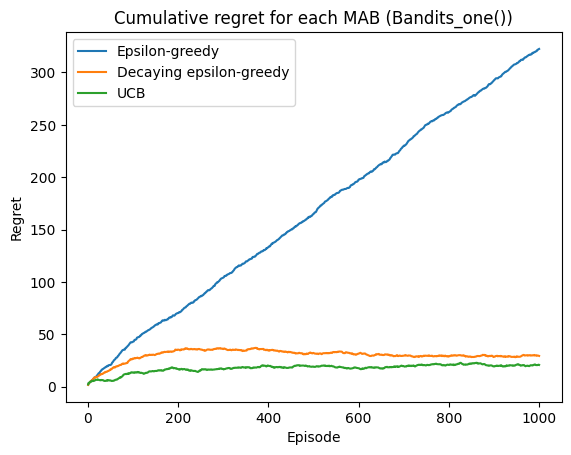

In [6]:
plt.plot(np.arange(1, episodes+1), mean_cumulative_regrets_1["epsilon-greedy"], label="Epsilon-greedy")
plt.plot(np.arange(1, episodes+1), mean_cumulative_regrets_1["decaying epsilon-greedy"], label="Decaying epsilon-greedy")
plt.plot(np.arange(1, episodes+1), mean_cumulative_regrets_1["ucb"], label="UCB")

plt.title("Cumulative regret for each MAB (Bandits_one())")
plt.ylabel("Regret")
plt.xlabel("Episode")

plt.legend()
plt.show()

------------------------------------------
### 4. (*)

Yes, this does match the asymptotic behaviour presented in class.

We can see that the normal Epsilon-greedy model (blue) has linear regret, whilst both the Decaying epsilon-greedy model (orange) and the UCB model (green) have logarithmic asymptotic regret.

This is easily explained by their exploration behaviour, as the normal Epsilon-greedy model continues exploring at the same rate all the time, regardless of how many episodes it has been running for. The Decaying epsilon-greedy model and the UCB model both gradually stop exploring the more sure they are that they've correctly sampled the expected reward of each action.

------------------------------------------

We can train each model several times with different hyperparameter values to observe how the regret of each algorithm changes.

In [7]:
# Train several versions of Epsilon-greedy with differing epsilon values
epsilons = [1, 0.5, 0.1, 0.05, 0]

epsilon_tuned_mean_cumulative_regrets = {}
for epsilon in epsilons:
    epsilon_tuned_mean_cumulative_regrets[epsilon] = [0] * episodes
    for _ in range(experiments):
        agent = EpsilonGreedy(epsilon=epsilon)
        observation, reward, terminated, truncated, info = env.reset()

        cumulative_reward = 0
        for episode in range(1, episodes+1):
            action = agent.sample()
            observation, reward, terminated, truncated, info = env.step(action)

            agent.update(action, reward)

            cumulative_reward += reward
            epsilon_tuned_mean_cumulative_regrets[epsilon][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments

            if terminated or truncated:
                observation, reward, terminated, truncated, info = env.reset()

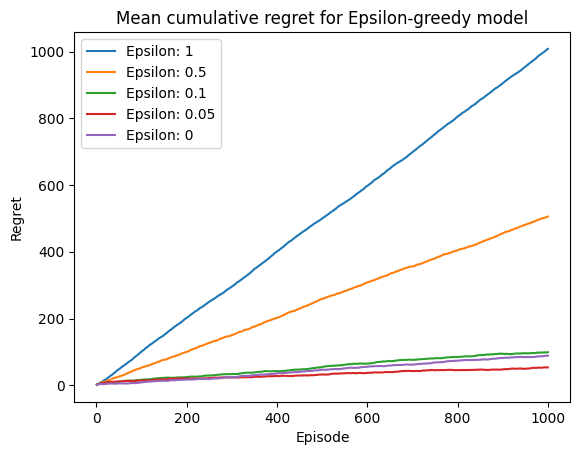

In [8]:
# Plot the different cumulative regret values for each respective epsilon value
for epsilon, regrets in epsilon_tuned_mean_cumulative_regrets.items():
    plt.plot(np.arange(1, episodes+1), regrets, label="Epsilon: " + str(epsilon))

plt.title("Mean cumulative regret for Epsilon-greedy model")
plt.xlabel("Episode")
plt.ylabel("Regret")

plt.legend()
plt.show()

It is obvious that the epsilon value has a great influence in how well the model performs!

This obviously makes sense, as a higher epsilon would mean a bigger focus on exploration rather than exploitation.

In [9]:
# Train several versions of Decaying epsilon-greedy with differing alpha values
alphas = [1, 0.5, 0.1, 0.05, 0]

alpha_tuned_mean_cumulative_regrets = {}
for alpha in alphas:
    alpha_tuned_mean_cumulative_regrets[alpha] = [0] * episodes
    for _ in range(experiments):
        agent = EpsilonGreedy(alpha=alpha)
        observation, reward, terminated, truncated, info = env.reset()

        cumulative_reward = 0
        for episode in range(1, episodes+1):
            action = agent.sample()
            observation, reward, terminated, truncated, info = env.step(action)

            agent.update(action, reward)

            cumulative_reward += reward
            alpha_tuned_mean_cumulative_regrets[alpha][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments

            if terminated or truncated:
                observation, reward, terminated, truncated, info = env.reset()

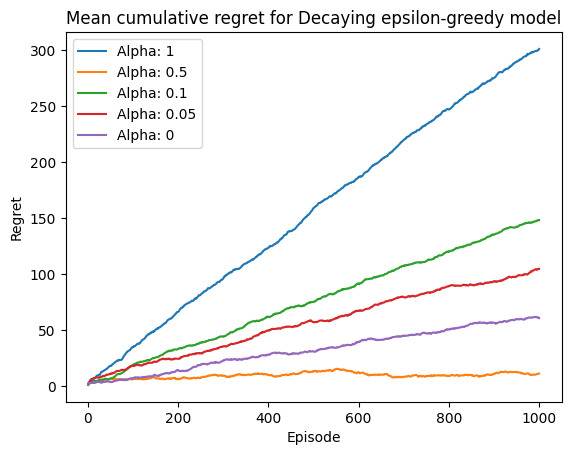

In [10]:
# Plot the different cumulative regret values for each respective alpha value
for alpha, regrets in alpha_tuned_mean_cumulative_regrets.items():
    plt.plot(np.arange(1, episodes+1), regrets, label="Alpha: " + str(alpha))

plt.title("Mean cumulative regret for Decaying epsilon-greedy model")
plt.xlabel("Episode")
plt.ylabel("Regret")

plt.legend()
plt.show()

In the same way that epsilon had a great influence in how the model performs, so does the alpha value!

This is because the alpha value governs how much exploration per episode should taper off. If alpha is high, then we should continue exploring at a higher relative rate than if alpha is low. If alpha is 1 we continue exploring just as much as the normal Greedy-epsilon does, whilst alpha of 0 would stop exploring after 1 (!) episode.

In [11]:
# Train several versions of UCB with differing c values
constants = [0, 1, 2, 5, 10, 100]

constant_tuned_mean_cumulative_regrets = {}
for constant in constants:
    constant_tuned_mean_cumulative_regrets[constant] = [0] * episodes
    for _ in range(experiments):
        agent = UCB(constant=constant)
        observation, reward, terminated, truncated, info = env.reset()

        cumulative_reward = 0
        for episode in range(1, episodes+1):
            action = agent.sample(episode)
            observation, reward, terminated, truncated, info = env.step(action)

            agent.update(action, reward)

            cumulative_reward += reward
            constant_tuned_mean_cumulative_regrets[constant][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments

            if terminated or truncated:
                observation, reward, terminated, truncated, info = env.reset()

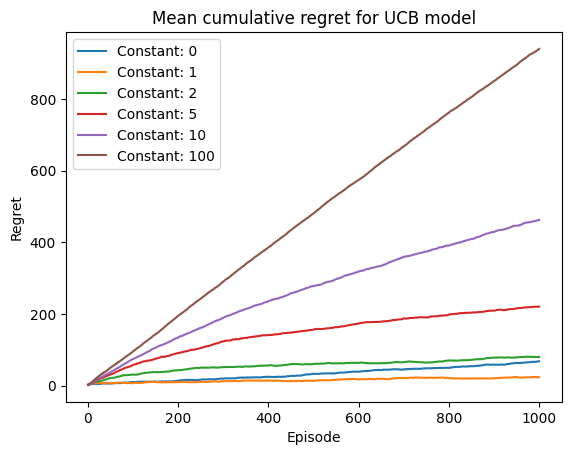

In [12]:
# Plot the different cumulative regret values for each respective constant value
for constant, regrets in constant_tuned_mean_cumulative_regrets.items():
    plt.plot(np.arange(1, episodes+1), regrets, label="Constant: " + str(constant))

plt.title("Mean cumulative regret for UCB model")
plt.xlabel("Episode")
plt.ylabel("Regret")

plt.legend()
plt.show()

Again, tuning the constant hyperparameter has a significant influence in how well the model does.

This hyperparameter controls how much a the given model should explore actions it is "unsure" about. The higher the constant, the more importance it gives these "unsure" actions. However, finding a balance is key (as a constant=1 performs much better than both constant=0 and constant=100).

------------------------------------------
### 6. (*)

This MAB problem is solved in the exact same way as the other problem, however with 4 possible actions each episode (instead of 3).

First we would need to update the expected value list to contain 4 values, instead of 3 (1 per medicine). However, there is actually no need in starting from scratch!

All 3 different algorithms are based on estimating the expected reward per action (i.e. per medicine). By adding a new medicine we do not change the other three medicines, thus their expected rewards stays the same. We can thus continue training the other models from where they are at now.

However, some models (like the decaying epsilon-greedy) changes how much they explore based on how many epsiodes they are trained on. Therefore, adding another medicine 1000 episodes in might mean that the chance of exploring this new medicine is practically 0. In this case, it would probably be best to restart from scratch (or reset the epsilon value back to a reasonable place).

In conclusion, it depends on which algorithm is being used, but one should not be forced to restart training from scratch.

------------------------------------------

We change the environment to Bandits_three(), and run the algorithm as above.

In [13]:
# Change environment to Bandits_three()
env = Bandits_three()

# The number of experiments, and how many episodes per experiment we run
experiments = 20
episodes = 1000

# Store mean cumulative rewards per episode for each algorithm (for bandits_three)
mean_cumulative_rewards_3 = {
    "epsilon-greedy": [0] * episodes,
    "decaying epsilon-greedy": [0] * episodes,
    "ucb": [0] * episodes,
}

# Store mean cumulative regrets per episode for each algorithm (for bandits_three)
mean_cumulative_regrets_3 = {
    "epsilon-greedy": [0] * episodes,
    "decaying epsilon-greedy": [0] * episodes,
    "ucb": [0] * episodes,
}

# Store the learned optimal action for each model, for each experiment
learned_optimal_actions_3 = {
    "epsilon-greedy": [None] * experiments,
    "decaying epsilon-greedy": [None] * experiments,
    "ucb": [None] * experiments,
}

In [14]:
# Epsilon-greedy model
print("Training Epsilon-greedy model for", episodes, "episodes over", experiments, "experiments")
for experiment in range(experiments):
    agent = EpsilonGreedy()
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        # Get the most optimal action (according to our agent)
        action = agent.sample()
        observation, reward, terminated, truncated, info = env.step(action)

        # Update the agent according to the reward
        agent.update(action, reward)

        # Store reward/regret values for later use
        cumulative_reward += reward
        mean_cumulative_regrets_3["epsilon-greedy"][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments
        mean_cumulative_rewards_3["epsilon-greedy"][episode-1] += cumulative_reward / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()

    # Store the learned optimal action for the current agent
    learned_optimal_actions_3["epsilon-greedy"][experiment] = np.argmax(agent.expected_reward)

print("Mean cumulative reward: %.2f" %mean_cumulative_rewards_3["epsilon-greedy"][-1])
print("Mean cumulative regret: %.2f" %mean_cumulative_regrets_3["epsilon-greedy"][-1])
print("Learned optimal actions:", learned_optimal_actions_3["epsilon-greedy"])

Training Epsilon-greedy model for 1000 episodes over 20 experiments
Mean cumulative reward: 2094.27
Mean cumulative regret: 105.73
Learned optimal actions: [2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0]


In [15]:
# Decaying epsilon-greedy model
print("Training Decaying epsilon-greedy model for", episodes, "episodes over", experiments, "experiments")
for experiment in range(experiments):
    agent = EpsilonGreedy(alpha=0.99)
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        # Get the most optimal action (according to our agent)
        action = agent.sample()
        observation, reward, terminated, truncated, info = env.step(action)

        # Update the agent according to the reward
        agent.update(action, reward)

        # Store reward/regret values for later use
        cumulative_reward += reward
        mean_cumulative_regrets_3["decaying epsilon-greedy"][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments
        mean_cumulative_rewards_3["decaying epsilon-greedy"][episode-1] += cumulative_reward / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()

    # Store the learned optimal action for the current agent
    learned_optimal_actions_3["decaying epsilon-greedy"][experiment] = np.argmax(agent.expected_reward)

print("Mean cumulative reward: %.2f" %mean_cumulative_rewards_3["decaying epsilon-greedy"][-1])
print("Mean cumulative regret: %.2f" %mean_cumulative_regrets_3["decaying epsilon-greedy"][-1])
print("Learned optimal actions:", learned_optimal_actions_3["decaying epsilon-greedy"])

Training Decaying epsilon-greedy model for 1000 episodes over 20 experiments
Mean cumulative reward: 2052.45
Mean cumulative regret: 147.55
Learned optimal actions: [2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]


In [16]:
# UCB model
print("Training UCB model for", episodes, "episodes over", experiments, "experiments")
for experiment in range(experiments):
    agent = UCB()
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        # Get the most optimal action (according to our agent)
        action = agent.sample(episode)
        observation, reward, terminated, truncated, info = env.step(action)

        # Update the agent according to the reward
        agent.update(action, reward)

        # Store reward/regret values for later use
        cumulative_reward += reward
        mean_cumulative_regrets_3["ucb"][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments
        mean_cumulative_rewards_3["ucb"][episode-1] += cumulative_reward / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()

    # Store the learned optimal action for the current agent
    learned_optimal_actions_3["ucb"][experiment] = np.argmax(agent.expected_reward)

print("Mean cumulative reward: %.2f" %mean_cumulative_rewards_3["ucb"][-1])
print("Mean cumulative regret: %.2f" %mean_cumulative_regrets_3["ucb"][-1])
print("Learned optimal actions:", learned_optimal_actions_3["ucb"])

Training UCB model for 1000 episodes over 20 experiments


Mean cumulative reward: 2032.44
Mean cumulative regret: 167.56
Learned optimal actions: [2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2]


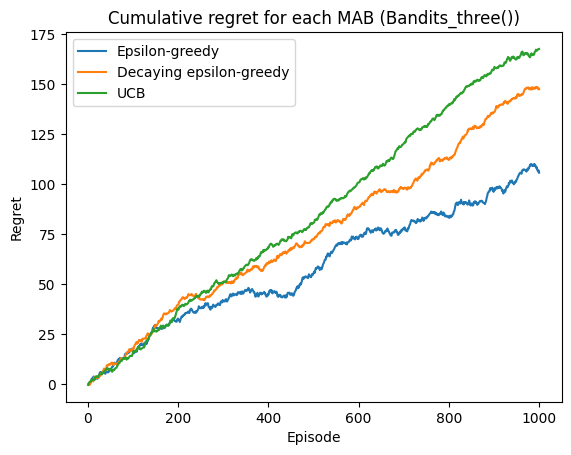

In [17]:
plt.plot(np.arange(1, episodes+1), mean_cumulative_regrets_3["epsilon-greedy"], label="Epsilon-greedy")
plt.plot(np.arange(1, episodes+1), mean_cumulative_regrets_3["decaying epsilon-greedy"], label="Decaying epsilon-greedy")
plt.plot(np.arange(1, episodes+1), mean_cumulative_regrets_3["ucb"], label="UCB")

plt.title("Cumulative regret for each MAB (Bandits_three())")
plt.ylabel("Regret")
plt.xlabel("Episode")

plt.legend()
plt.show()

We can see that this problem is way different than Bandits_one(), as all three algorithms perform equally (bad!).

Let's compare the cumulative regret of the algorithms running on Bandits_one() vs on Bandits_tree().

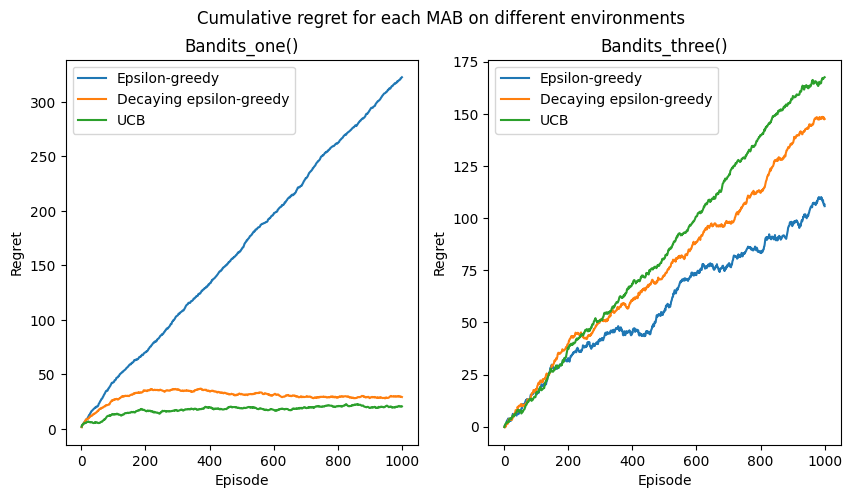

In [18]:
fig, axes = plt.subplots(ncols=2, squeeze=True, figsize=(10, 5))

# Plot regret for Bandits_one()
axes[0].plot(np.arange(1, episodes+1), mean_cumulative_regrets_1["epsilon-greedy"], label="Epsilon-greedy")
axes[0].plot(np.arange(1, episodes+1), mean_cumulative_regrets_1["decaying epsilon-greedy"], label="Decaying epsilon-greedy")
axes[0].plot(np.arange(1, episodes+1), mean_cumulative_regrets_1["ucb"], label="UCB")

axes[0].set_title("Bandits_one()")
axes[0].set_ylabel("Regret")
axes[0].set_xlabel("Episode")

axes[0].legend()

# Plot regret for Bandits_three()
axes[1].plot(np.arange(1, episodes+1), mean_cumulative_regrets_3["epsilon-greedy"], label="Epsilon-greedy")
axes[1].plot(np.arange(1, episodes+1), mean_cumulative_regrets_3["decaying epsilon-greedy"], label="Decaying epsilon-greedy")
axes[1].plot(np.arange(1, episodes+1), mean_cumulative_regrets_3["ucb"], label="UCB")

axes[1].set_title("Bandits_three()")
axes[1].set_ylabel("Regret")
axes[1].set_xlabel("Episode")

axes[1].legend()

plt.suptitle("Cumulative regret for each MAB on different environments")
plt.show()

------------------------------------------
### 9. (*)

From the plots we can see that Bandits_one() follows the expected behaviour of each algorithm, whilst all algorithms behave noisy and linear on Bandits_tree().

Comparing the two plots it is easy to see that our algorithms performed way worse on Bandits_three() than on Bandits_one(). Therefore, we can conclude that Bandits_one() was the easiest MAB to solve. 

Inspecting how the different environments are set up we can understand why.

Every reward in Bandits_one() has a variance of 1, in Bandits_three(), the third medicine has a reward with variance of 3. This means that the reward from medicine Z of Bandits_three() could vary wildly compared to every medicine in Bandits_one(). This also means that Bandits_three() will be harder to solve, as it is harder to compute a representative expectation value.

------------------------------------------

Now we change the environment to Bandits_tree(), and choose to run two different bandits, one for each gene. As UCB seemed to perform better on Bandits_one() we choose this algorithm. 

In [19]:
# Instantiate one evironment per gene
envs = {
    0: Bandits_four(gene=0),
    1: Bandits_four(gene=1),
}

# The number of experiments, and how many episodes per experiment we run
experiments = 20
episodes = 1000

# Store mean cumulative rewards per episode for each UCB (for bandits_four)
mean_cumulative_rewards_4 = {
    0: [0] * episodes,
    1: [0] * episodes,
}

# Store mean cumulative regrets per episode for each UCB (for bandits_four)
mean_cumulative_regrets_4 = {
    0: [0] * episodes,
    1: [0] * episodes,
}

# Store the learned optimal action for each model, for each experiment
learned_optimal_actions_4 = {
    0: [None] * experiments,
    1: [None] * experiments,
}

In [20]:
# UCB model with gene = 0
gene = 0
env = envs[gene]

print("Training UCB gene", gene, "for", episodes, "episodes over", experiments, "experiments")
for experiment in range(experiments):
    agent = UCB()
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        # Get the most optimal action (according to our agent)
        action = agent.sample(episode)
        observation, reward, terminated, truncated, info = env.step(action)

        # Update the agent according to the reward
        agent.update(action, reward)

        # Store reward/regret values for later use
        cumulative_reward += reward
        mean_cumulative_regrets_4[gene][episode-1] += (episode * env.means[gene][env.get_optimal_action()] - cumulative_reward) / experiments
        mean_cumulative_rewards_4[gene][episode-1] += cumulative_reward / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()
    
    # Store the learned optimal action for the current agent
    learned_optimal_actions_4[gene][experiment] = np.argmax(agent.expected_reward)

print("Mean cumulative reward: %.2f" %mean_cumulative_rewards_4[gene][-1])
print("Mean cumulative regret: %.2f" %mean_cumulative_regrets_4[gene][-1])
print("Learned optimal actions:", learned_optimal_actions_4[gene])

Training UCB gene 0 for 1000 episodes over 20 experiments
Mean cumulative reward: 2037.58
Mean cumulative regret: 162.42
Learned optimal actions: [1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1]


In [21]:
# UCB model with gene = 1
gene = 1
env = envs[gene]

print("Training UCB gene", gene, "for", episodes, "episodes over", experiments, "experiments")
for experiment in range(experiments):
    agent = UCB()
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        # Get the most optimal action (according to our agent)
        action = agent.sample(episode)
        observation, reward, terminated, truncated, info = env.step(action)

        # Update the agent according to the reward
        agent.update(action, reward)

        # Store reward/regret values for later use
        cumulative_reward += reward
        mean_cumulative_regrets_4[gene][episode-1] += (episode * env.means[gene][env.get_optimal_action()] - cumulative_reward) / experiments
        mean_cumulative_rewards_4[gene][episode-1] += cumulative_reward / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()
    
    # Store the learned optimal action for the current agent
    learned_optimal_actions_4[gene][experiment] = np.argmax(agent.expected_reward)

print("Mean cumulative reward: %.2f" %mean_cumulative_rewards_4[gene][-1])
print("Mean cumulative regret: %.2f" %mean_cumulative_regrets_4[gene][-1])
print("Learned optimal actions:", learned_optimal_actions_4[gene])

Training UCB gene 1 for 1000 episodes over 20 experiments
Mean cumulative reward: 2971.59
Mean cumulative regret: 28.41
Learned optimal actions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


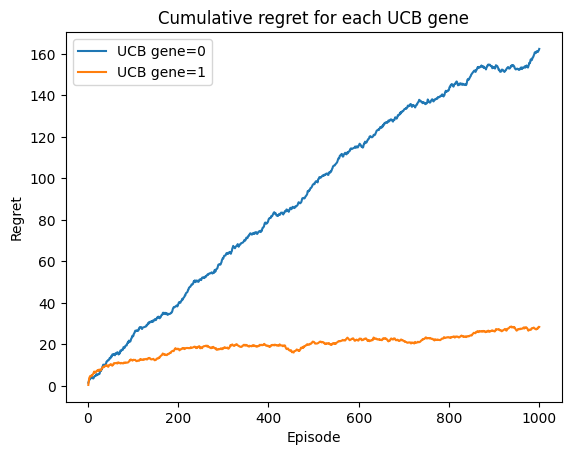

In [22]:
plt.plot(np.arange(1, episodes+1), mean_cumulative_regrets_4[0], label="UCB gene=0")
plt.plot(np.arange(1, episodes+1), mean_cumulative_regrets_4[1], label="UCB gene=1")

plt.title("Cumulative regret for each UCB gene")
plt.ylabel("Regret")
plt.xlabel("Episode")

plt.legend()
plt.show()

Let's formalize and compute the actual expected rewards for each medicine X, Y, Z for each value of the gene.

We know that the rewards of both are normally distributed with respective variances $V_X = 1, V_Y = 1, V_Z = 3$.

For a normal distribution, the expectation value is equal to the mean $\mu$. Inspecting the different means we have that:

$$ \mu_{X | \text{gene}=0} = E[X | \text{gene}=0] = 1 $$
$$ \mu_{Y | \text{gene}=0} = E[Y | \text{gene}=0] = 2 $$
$$ \mu_{Z | \text{gene}=0} = E[Z | \text{gene}=0] = 2.2 $$

$$ \mu_{X | \text{gene}=1} = E[X | \text{gene}=1] = 3 $$
$$ \mu_{Y | \text{gene}=1} = E[Y | \text{gene}=1] = 1 $$
$$ \mu_{Z | \text{gene}=1} = E[Z | \text{gene}=1] = 2.2 $$

Therefore, we should expect the bandit with gene = 0 to learn the optimal action 2 (medicine Z) whilst the bandit with gene = 1 should learn the optimal action 0 (medicine X).

------------------------------------------
### 12. (*)

When inspecting the different learned optimal actions, we see that the bandit with gene = 0 flips between choosing action 1 and action 2. This obviously makes sense, as they have very similar means, and action 2 has higher variance.

However, bandit gene = 1 consistently learns the actual optimal action 0.

For the Bandits_three() environment, all models predict that either 0 or 2 is the optimal action, where as the actual optimal action is 2.

Thus, they share the optimal action for Bandits_four() with gene = 0, but for gene = 1 they differ (as here the optimal action is 0).

The reason they differ is because for Bandits_three(), the different medicines have other mean values than what the medicines for each gene has in Bandits_four(). However, in both Bandits_three() and Bandits_four() with gene = 0, the action with the highest mean is action 2.

------------------------------------------